<font color='4682B4'>
    
    

# Исследование объявлений о продаже квартир

В моем распоряжении данные сервиса Яндекс. Недвижимость - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. В рамках данного исследования нужно определить рыночную стоимость объектов недвижимости. Моя задача - установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Цель исследования:
1. Определить рыночную стоимость объектов недвижимости.
2. Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность
3. Установить, какие факторы влияют на ценообразование стоимости квартир
## Ход исследования:
Данные о недвижимости я получу из файла " /datasets/real_estate_data.csv' . О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.
Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы, и приступлю к проведению исследовательского анализа.
Таким образом, моё исследование пройдёт в семь этапов:

- Обзор данных.
- Предобработка данных.
- Расчеты и добавление результатов в таблицу.
- Проведение анализа для Ленинградской области.
- Проведение анализа для Санкт-Петербурга.
- Различаются ли факторы, которые влияют на ценообразование стоимости квартир.
- Написание общего вывода


Приступим
<font>

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

try:
    data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data=pd.read_csv(r'C:\Users\kater\Downloads\real_estate_data.csv', sep='\t')


In [2]:
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

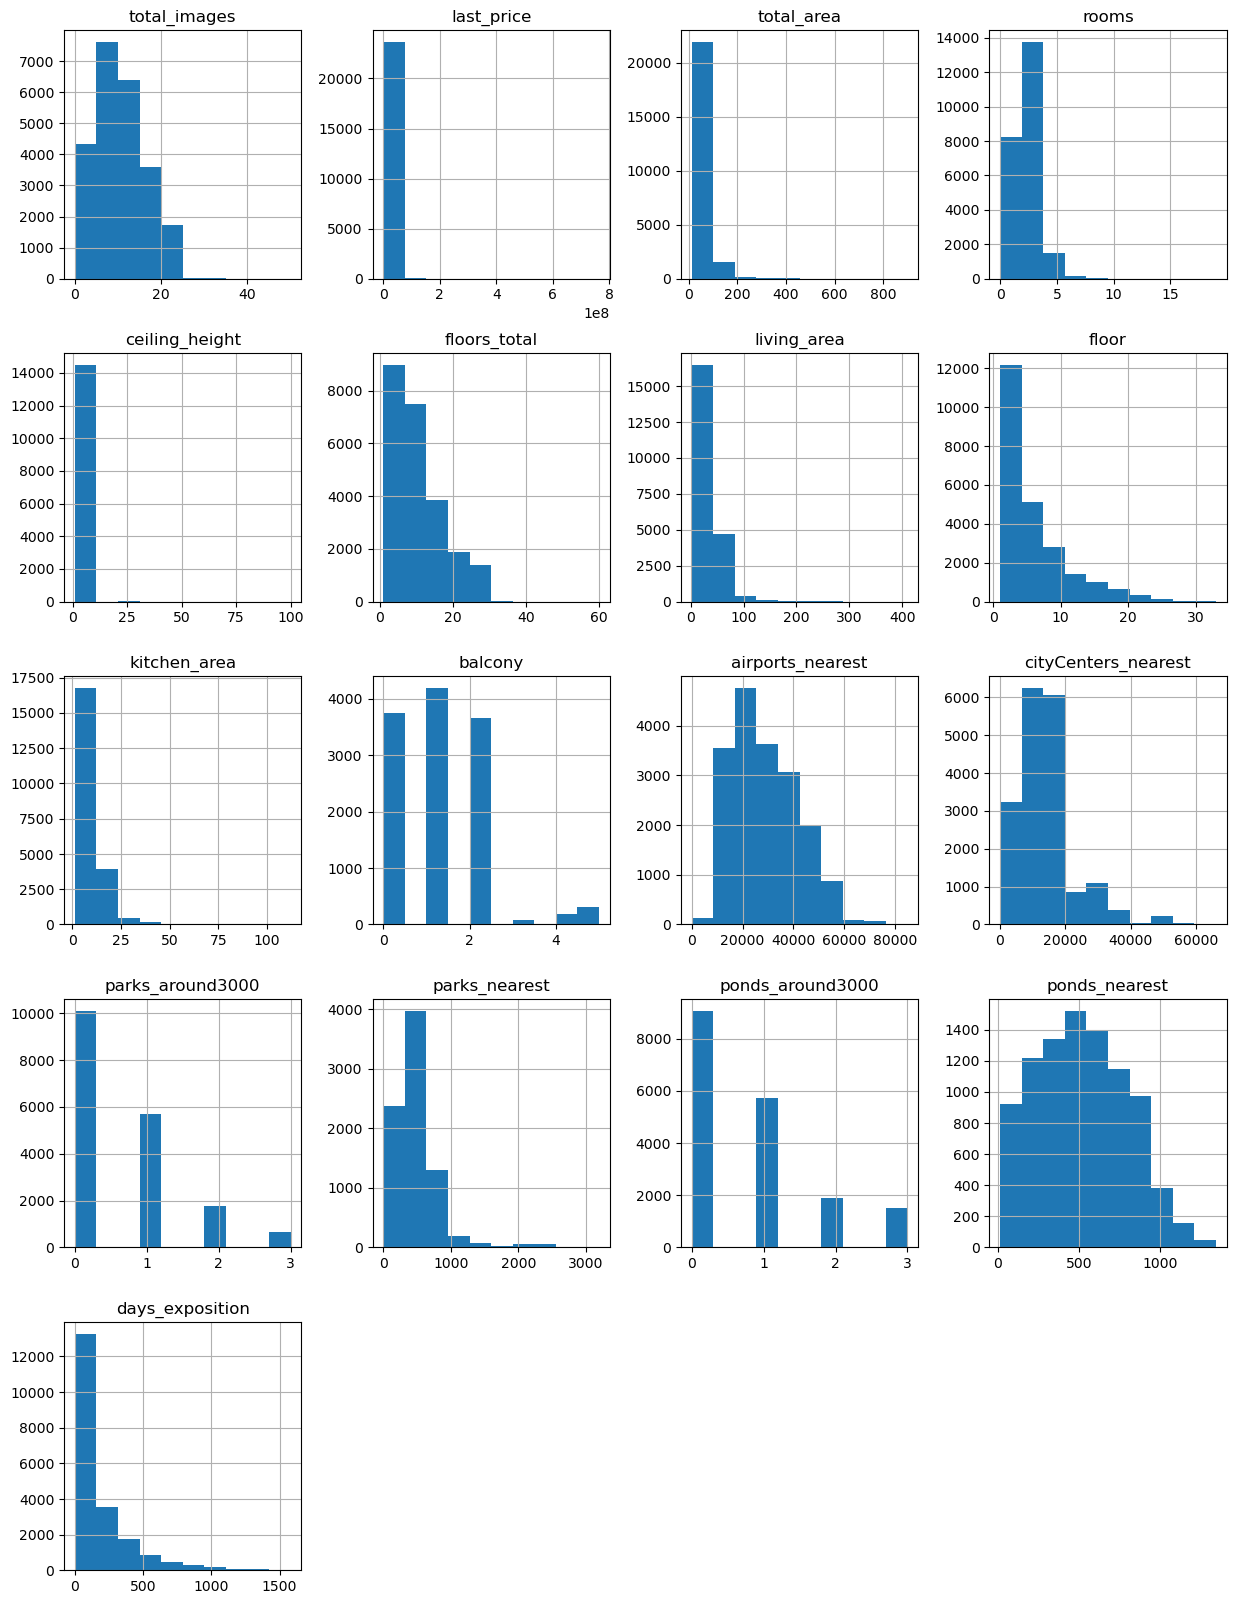

In [4]:
data.hist(figsize=(15,20));

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


<font color='4682B4'>
    
## Данный проект основан на анализе архива объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
    
### Описание данных:
    
    
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип) 
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта 
* open_plan — свободная планировка (булев тип)  
* parks_around3000 — число парков в радиусе 3 км 
* parks_nearest — расстояние до ближайшего парка (м)  
* ponds_around3000 — число водоёмов в радиусе 3 км  
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении
    
    При изучении общей информации я заметила следующее:
* В данных есть пропуски, в столбце is_apartment наибольшее их количества. Много пропусков в данных, связанных с парками и водоемами рядом.
* Изучив гистограммы, также выявила аномальные значения.Например, в столбце "ceiling_height", в котором описана высота потолка.
* Есть ошибки в типе данных. Например, first_day_exposition-данные типа object, для удобства нужно будет перевести их в тип datetime. 
    
    Приступим к предобработке данных.
   
    

### Предобработка данных

In [6]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

<font color='4682B4'>Для начала удалим аномальные значения: </font>

In [7]:
data=data.loc[(data['ceiling_height'].isna()) | ((data['ceiling_height'] <= 10) & (data['ceiling_height'] >= 2.5))]

In [8]:
data['ceiling_height'].unique()

array([2.7 ,  nan, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57,
       4.15, 3.5 , 3.3 , 2.71, 4.  , 2.73, 2.84, 3.1 , 3.4 , 3.06, 2.72,
       2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87, 2.66, 2.59,
       3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62, 3.12, 2.53,
       2.74, 2.96, 5.3 , 5.  , 2.79, 2.95, 4.06, 2.94, 3.82, 3.54, 3.53,
       2.83, 4.7 , 3.38, 3.01, 5.6 , 3.65, 3.9 , 3.18, 3.35, 3.57, 2.62,
       2.82, 3.98, 2.63, 3.83, 3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66,
       3.85, 3.86, 4.19, 3.24, 4.8 , 4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07,
       3.37, 3.09, 8.  , 3.26, 3.34, 2.81, 3.44, 2.97, 3.14, 4.37, 2.68,
       3.22, 3.27, 4.1 , 2.93, 3.46, 3.47, 3.33, 3.63, 3.32, 8.3 , 2.98,
       2.86, 3.17, 4.4 , 3.28, 3.04, 4.45, 5.5 , 3.84, 3.23, 3.02, 3.21,
       3.43, 3.78, 4.3 , 3.39, 2.69, 3.31, 4.65, 3.56, 3.51, 3.93, 3.42,
       2.99, 3.49, 4.14, 2.91, 3.88, 4.25, 3.29, 3.

<font color='4682B4'>Теперь заполним пропуски медианным значением, так как высота потолком, в среднем, примерно одинаковая.</font>

In [9]:
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median())

In [10]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1897
floor                       0
is_apartment            20850
studio                      0
open_plan                   0
kitchen_area             2266
balcony                 11482
locality_name              49
airports_nearest         5502
cityCenters_nearest      5479
parks_around3000         5478
parks_nearest           15556
ponds_around3000         5478
ponds_nearest           14521
days_exposition          3165
dtype: int64

<font color='4682B4'>Я думаю, что пропуски в данной категории могли появиться из-за отсутствия точной информации и, следовательно, пропуска этой ячейки при заполнении.</font>

In [11]:
data['floors_total'].value_counts()

5.0     5745
9.0     3749
16.0    1374
12.0    1355
4.0     1197
10.0    1172
25.0    1074
6.0      910
17.0     831
3.0      667
7.0      591
14.0     549
18.0     504
24.0     468
8.0      388
2.0      377
15.0     364
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     202
27.0     164
21.0     158
26.0     124
35.0      24
1.0       23
28.0      21
36.0       2
29.0       1
60.0       1
52.0       1
34.0       1
33.0       1
Name: floors_total, dtype: int64

<font color='4682B4'>Аномальные значения появляются после 28 этажа, так как, во-первых, таких высоких жилых зданий в СПБ не существует, во-вторых, такие значения встречаются крайне редко. Поэтому мы от них избавимся. </font>

In [12]:
data=data.loc[(data['floors_total'].isna())|(data['floors_total']>=1) & (data['floors_total']<=28)]

In [13]:
data['floors_total'].value_counts()

5.0     5745
9.0     3749
16.0    1374
12.0    1355
4.0     1197
10.0    1172
25.0    1074
6.0      910
17.0     831
3.0      667
7.0      591
14.0     549
18.0     504
24.0     468
8.0      388
2.0      377
15.0     364
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     202
27.0     164
21.0     158
26.0     124
1.0       23
28.0      21
Name: floors_total, dtype: int64

In [14]:
data['living_area'].unique()

array([51.  , 18.6 , 34.3 , ..., 31.65, 13.59, 42.55])

<font color='4682B4'>Здесь также заполним данные медианным значением, сгруппировав данные по количеству комнат, в целях улучшения качества данных. </font>

In [15]:
data['living_area']=data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median'))

<font color='4682B4'> Пропуски в данной категории, думаю, также являются технической ошибкой. Обычно такие данные заполняются в первую очередь, здесь они, скорее всего, были утеряны.</font>

In [16]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment            20823
studio                      0
open_plan                   0
kitchen_area             2263
balcony                 11467
locality_name              49
airports_nearest         5502
cityCenters_nearest      5479
parks_around3000         5478
parks_nearest           15529
ponds_around3000         5478
ponds_nearest           14519
days_exposition          3158
dtype: int64

<font color='4682B4'> Для заполнения пропуска данных в "is_apartment", я решила воспользоваться столбцом "studio", заполнив пропуски аналогичными значениями</font>

In [17]:
data['is_apartment']=data['is_apartment'].fillna(data['is_apartment'].where(data['studio']==True,True))
data['is_apartment']=data['is_apartment'].fillna(data['is_apartment'].where(data['studio']==False,False))

<font color='4682B4'> Пропуски в данной категории, думаю, также являются технической ошибкой. Обычно такие данные заполняются в первую очередь, здесь они, скорее всего, были утеряны.</font>

In [18]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2263
balcony                 11467
locality_name              49
airports_nearest         5502
cityCenters_nearest      5479
parks_around3000         5478
parks_nearest           15529
ponds_around3000         5478
ponds_nearest           14519
days_exposition          3158
dtype: int64

<font color='4682B4'>Kitchen area также заполняю, сгруппировав данные по rooms.
</font>


In [19]:
data['kitchen_area']=data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_area'].transform('median'))

In [20]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              194
balcony                 11467
locality_name              49
airports_nearest         5502
cityCenters_nearest      5479
parks_around3000         5478
parks_nearest           15529
ponds_around3000         5478
ponds_nearest           14519
days_exposition          3158
dtype: int64

<font color='4682B4'> Пропуски в данной категории, думаю, могли появиться из-за отсутствия точных данных. Не исключаю также техническую ошибку, так как этот параметр довольно значимый при продаже недвижимости.</font>

<font color='4682B4'> Пропуски данных в столбце "Balcony", думаю, связаны с отсутствием балкона. Поэтому мы их заполним значением "0".</font>

In [21]:
data['balcony']=data['balcony'].fillna(0)

In [22]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              194
balcony                     0
locality_name              49
airports_nearest         5502
cityCenters_nearest      5479
parks_around3000         5478
parks_nearest           15529
ponds_around3000         5478
ponds_nearest           14519
days_exposition          3158
dtype: int64

<font color='4682B4'> Пропуски в locality_name заполнить какими-то значениями не получится, поэтому оставлю там значение "город неизвестен". Во избежание дубликатов также заменим ё на е в названиях городов.</font> 

In [23]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name']=data['locality_name'].fillna('Город неизвестен')

In [24]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              194
balcony                     0
locality_name               0
airports_nearest         5502
cityCenters_nearest      5479
parks_around3000         5478
parks_nearest           15529
ponds_around3000         5478
ponds_nearest           14519
days_exposition          3158
dtype: int64

<font color='4682B4'> Что касается категорий "airports_nearest", "cityCenters_nearest", "parks_around3000", "parks_nearest ", "ponds_around3000", "ponds_nearest", я заполняю их значением "0", что означает, что данные места отсутствуют в месте продаж недвижимости (в основном это села, деревни и т.д.)</font> 

In [25]:
data['airports_nearest']=data['airports_nearest'].fillna('0')
data['cityCenters_nearest']=data['cityCenters_nearest'].fillna('0')
data['parks_around3000']=data['parks_around3000'].fillna('0')
data['parks_nearest']=data['parks_nearest'].fillna('0')
data['ponds_around3000']=data['ponds_around3000'].fillna('0')
data['ponds_nearest']=data['ponds_nearest'].fillna('0')

In [26]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              86
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area             194
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3158
dtype: int64

In [28]:
data.isna().sum()

total_images              0
last_price                0
total_area                0
first_day_exposition      0
rooms                     0
ceiling_height            0
floors_total             86
living_area               0
floor                     0
is_apartment              0
studio                    0
open_plan                 0
kitchen_area            194
balcony                   0
locality_name             0
airports_nearest          0
cityCenters_nearest       0
parks_around3000          0
parks_nearest             0
ponds_around3000          0
ponds_nearest             0
days_exposition           0
dtype: int64

<font color='4682B4'> Избавимся от оставшихся пропусков.

In [29]:
data=data.dropna().reset_index(drop=True)

In [30]:
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

<font color='4682B4'> Далее мы изменим типы данных на нужные. "first_day_exposition" на datetime, "floors_total", "balcony", "days_exposition" на int, так как они хранят в себе целые числа.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23293 entries, 0 to 23292
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23293 non-null  int64  
 1   last_price            23293 non-null  float64
 2   total_area            23293 non-null  float64
 3   first_day_exposition  23293 non-null  object 
 4   rooms                 23293 non-null  int64  
 5   ceiling_height        23293 non-null  float64
 6   floors_total          23293 non-null  float64
 7   living_area           23293 non-null  float64
 8   floor                 23293 non-null  int64  
 9   is_apartment          23293 non-null  bool   
 10  studio                23293 non-null  bool   
 11  open_plan             23293 non-null  bool   
 12  kitchen_area          23293 non-null  float64
 13  balcony               23293 non-null  float64
 14  locality_name         23293 non-null  object 
 15  airports_nearest   

In [32]:
data['floors_total']=data['floors_total']. astype('int')
data['balcony']=data['balcony']. astype('int')
data['days_exposition']=data['days_exposition']. astype('int')
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
data['last_price']=data['last_price']. astype('int')

In [33]:
data['locality_name'].drop_duplicates(keep='first').reset_index(drop=True)

0                Санкт-Петербург
1                 поселок Шушары
2      городской поселок Янино-1
3              поселок Парголово
4                 поселок Мурино
                 ...            
322          поселок Володарское
323    коттеджный поселок Лесное
324            деревня Тихковицы
325       деревня Борисова Грива
326         поселок Дзержинского
Name: locality_name, Length: 327, dtype: object

In [34]:
data.duplicated().sum()

0

In [35]:
data['locality_name']=data['locality_name'].str.replace('деревня','')
data['locality_name']=data['locality_name'].str.replace('поселок','')
data['locality_name']=data['locality_name'].str.replace('коттеджный','')
data['locality_name']=data['locality_name'].str.replace('городской','')
data['locality_name']=data['locality_name'].str.replace('городского типа','')
data['locality_name']=data['locality_name'].str.replace('садовое товарищество','')
data['locality_name']=data['locality_name'].str.replace('село','')
data['locality_name']=data['locality_name'].str.replace('садоводческое некоммерческое товарищество','')
data['locality_name']=data['locality_name'].str.replace('при железнодорожной станции','')
data['locality_name']=data['locality_name'].str.strip()

In [36]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Сланцы', 'Путилово',
       'Ивангород', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'Новый Свет', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

<font color='4682B4'>
    На этапе предобработки данных, я проделала следующую работу:
    
* заполнила пропуски в значениях
* избавилась от пропусков там, где заполнить их какими-либо значениями было невозможно
* сменила тип данных на нужный для облегчения работы с данными
* удалила все явные и неявные дубликаты в данных
    
    ## Вывод
    
    Причины появления пропусков в различных столбцах могут быть следующими:
    
* неправильное заполнение данных (пропуск нужных ячеек, несохранение данных)
* повреждение, потеря данных при выгрузке 
* человеческий фактор (например, в столбце "balcony" вместо заполнения значением "0", люди могли пропускать эту ячейку, "оставляя" значение NaN) </font> 

### Посчитаем и добавим в таблицу новые столбцы

<font color='4682B4'> Добавим в таблицу новые столбцы. Первым добавим столбец one_m_cost, в котором будут храниться данные цены за один квадратный метр для каждой квартиры.</font> 

In [37]:
data['one_m_cost']=data['last_price']/data['total_area']

In [38]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_m_cost
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,114,120370.370370
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,2,Шушары,12817.0,18603.0,0.0,0,0.0,0,81,82920.792079
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.714286
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,True,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.100629
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.000000


<font color='4682B4'>Далее добавим столбец с днем недели, 0 в нем будет означать "понедельник", 1- вторник и так далее. Также добавим столбец с месяцем и годом публикации объявления.</font>

In [39]:
data['week_day']= data['first_day_exposition'].dt.weekday
data['month']=data['first_day_exposition'].dt.month
data['year']=data['first_day_exposition'].dt.year

<font color='4682B4'>Далее добавим столбец с номером этажа квартиры. Значения- "первый", "последний" или "другой" </font>

In [40]:
data['floor_type'] = 'другой'
data['floor_type'] = data['floor_type'].where(data['floor']!=1, 'первый')
data['floor_type'] = data['floor_type'].where(data['floor']!=data['floors_total'], 'последний')

<font color='4682B4'> Далее добавим столбец с расстоянием до центра города в километрах (для этого переведем данные в километры и округлим до целых значений) : </font>

In [41]:
data['cityCenters_nearest']=data['cityCenters_nearest'].astype(int)
data['city_center_km']= round(data['cityCenters_nearest']/1000)

In [42]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_m_cost,week_day,month,year,floor_type,city_center_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,114,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,0,0.0,0,81,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,90.0,2.0,574.0,558,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,True,...,84.0,3.0,234.0,424,408176.100629,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121,100000.000000,1,6,2018,другой,8.0


<font color='4682B4'>Теперь, когда есть все необходимые данные, мы можем приступить к исследовательскому анализу данных.</font>

### Проведем исследовательский анализ данных

<font color='4682B4'>Начать данный анализ я бы хотела с площади квартиры.
Для этого я построю гистограмму значений столбца "total_area"</font>

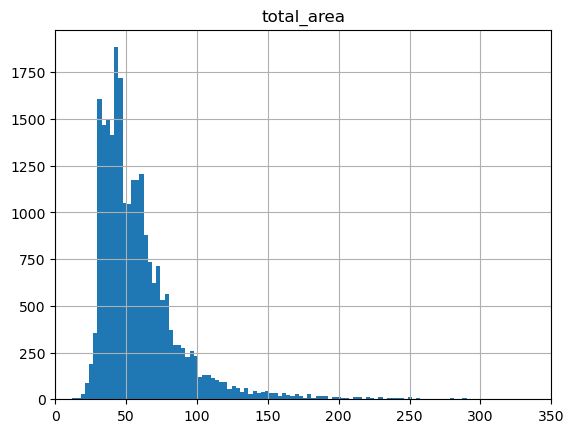

In [9]:
data.hist('total_area', bins=300)
plt.xlim(0,350);

<font color='4682B4'>Наиболее популярны среди покупателей квартиры площадью 50-70 кв.м. Квартиры более 120 кв.м. покупаются крайне редко. Думаю, помимо очевидного (стоимости данных квартир, которая является слишком высокой для среднестатистического покупателя), это также обусловлено малым количеством подобных квартир в России. Средняя площадь квартир, согласно статистике,- 50-60 кв.м.
</font>

<font color='4682B4'>Также проанализируем жилую площадь.</font>

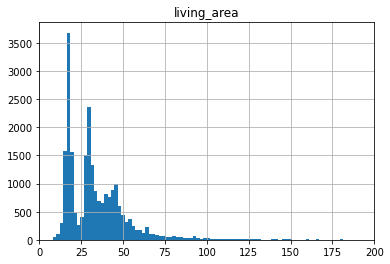

In [44]:
data.hist('living_area', bins=200)
plt.xlim(0,200);

<font color='4682B4'> Наиболее популярная жилая площадь 15-20 кв.м. Квартиры с жилой площадью более 75 кв.м. являются наименее популярными. Причины для этого те же 1) стоимость, 2)наличие (скорее, отсутствие) квартир подобного размера. Интересно также резкое снижение в диапозоне 20-25 кв.м.  </font>

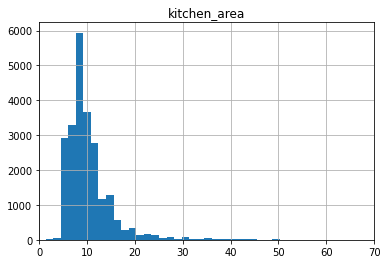

In [45]:
data.hist('kitchen_area', bins=70)
plt.xlim(0,70);

<font color='4682B4'>Здесь наиболее популярными являются квартиры с площадью кухни 5-12 кв.м., при том самый пик приходится на ~7. </font>

<font color='4682B4'> Проанализируем также цену, по которой квартиру удалось продать.</font> 

,count,mean,std,min,25%,50%,75%,max
rooms,,,,,,,,
1,7978.0,3.835016e+06,1.898547e+06,430000.0,2900000.0,3600000.0,4450000.0,43511000.0
2,7853.0,5.595244e+06,4.953295e+06,12190.0,3690000.0,4775000.0,6550000.0,289238400.0
3,5770.0,8.183358e+06,8.892512e+06,550000.0,4782500.0,6200000.0,9000000.0,330000000.0
4,1173.0,1.343707e+07,1.571744e+07,999000.0,6200000.0,9000000.0,14900000.0,159984000.0
5,325.0,2.379830e+07,3.297585e+07,1650000.0,10000000.0,14000000.0,25800000.0,401300000.0
6,104.0,3.188004e+07,4.168788e+07,4390000.0,13022500.0,19000000.0,30787250.0,245000000.0
7,59.0,5.147007e+07,1.045505e+08,7900000.0,16700000.0,24900000.0,43500000.0,763000000.0
8,12.0,5.022417e+07,5.594771e+07,15800000.0,17625000.0,23095000.0,44675000.0,180000000.0
9,8.0,3.415236e+07,2.403385e+07,17000000.0,21562500.0,23750000.0,34242225.0,88000000.0


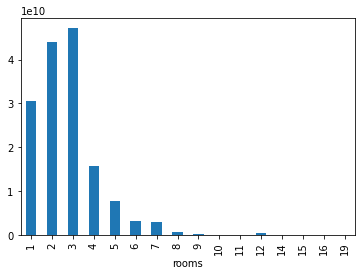

In [46]:
data_prices = data.groupby(['rooms'])['last_price']. sum ()
data_prices.plot(kind='bar')

data.groupby(['rooms'])['last_price'].describe()

<font color='4682B4'> В данной категории я решила сгруппировать цену по комнатам, как мне кажется, так анализ будет точнее. Здесь мы можем увидеть минимальную и максимальную цену в зависимости от количества квартир. Заметила некоторые аномалии, потому умножу все значения ниже 30000 на 10, так как квартира не может стоить 12-30 тыс.руб., я думаю, что это ошибка при занесении данных</font>

In [47]:
def price (price):
    if price<30000:
        return price*10
    return price
data['last_price']=data['last_price'].apply(price)

count    2.329300e+04
mean     6.577341e+06
std      1.096016e+07
min      1.219000e+05
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

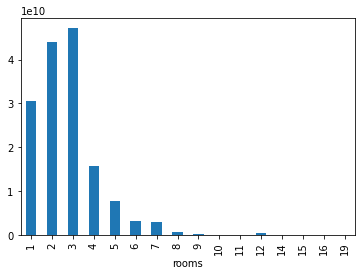

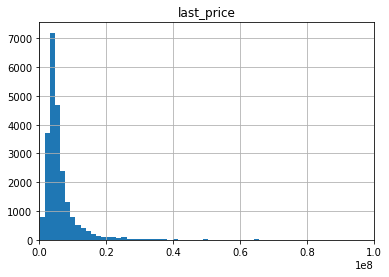

In [48]:
data_prices = data.groupby(['rooms'])['last_price']. sum ()
data_prices.plot(kind='bar')
data.hist('last_price', bins=500)
plt.xlim(0,100000000)

data.groupby(['rooms'])['last_price'].describe()
data['last_price'].describe()

<font color='4682B4'>Пик цены в районе 5 млн. Ближе к 18 млн график снижается и практически сходит на нет в районе 27 млн. </font>

<font color='4682B4'> Далее изучим параметр rooms, отвечающий за количество комнат в проданных квартирах</font>

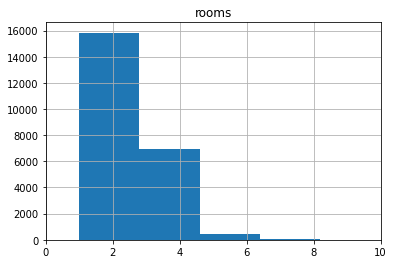

In [49]:
data.hist('rooms',bins=10)
plt.xlim(0,10);

<font color='4682B4'>Наибольшей популярностью пользуются квартиры 1-3хкомнатные. Реже покупают 4хкомнатные квартиры, совсем редко 5-6, 7-8комнатные квартиры покупают единицы.</font>

<font color='4682B4'>Следующим параметром проанализируем высоту потолков.</font>

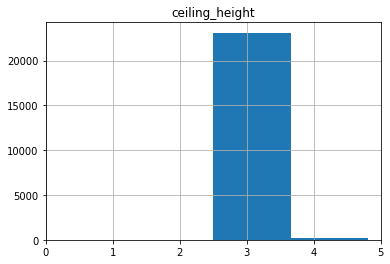

In [50]:
data.hist('ceiling_height', bins=5)
plt.xlim (0, 5);

<font color='4682B4'> 2,5-3,5 метров- наиболее популярная высота потолков в данном перечне квартир. Совсем редко встречаются потолки выше 3,5, выше 5 не встречаются вовсе.</font>

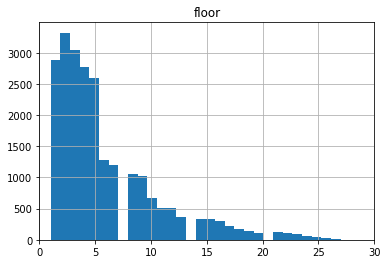

In [51]:
data.hist('floor', bins=30)
plt.xlim(0,30);

<font color='4682B4'> Здесь хорошо видно, что количество проданных квартир уменьшается пропорционально увеличению этажа квартиры. Так, квартиры, находящиеся на 1-6 этаже являются наиболее часто покупаемыми. Квартиры на этажах 9-11 менее популярны. Квартиры, находящиеся на этажах 13-20, покупались реже 500 раз. Совсем редко покупались квартиры выше 25 этажа.</font>

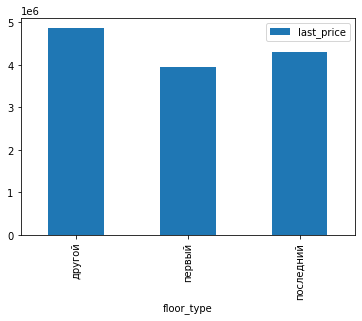

In [52]:
floor_type_pivot=data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
floor_type_pivot.plot(kind='bar');

<font color='4682B4'> Здесь решила проанализировать медианное значение цены в зависимости от этажа квартир. Таким образом, мы видим, что цена за квартиры не на первом и не на последнем этаже значительно выше. При том, если сравнивать первый и последний этаж, средняя цена за квартиру на последнем также выше средней цены за квартиру на первом. </font>

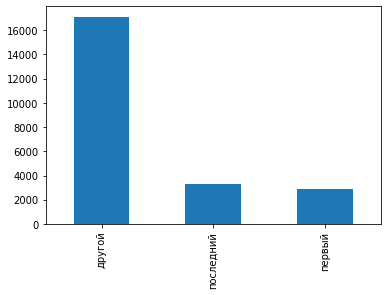

In [53]:
data['floor_type'].value_counts().plot(kind='bar');

<font color='4682B4'>Этот график также подтвреждает, что квартиры на любом другом этаже, кроме первого и последнего, продаются гораздо чаще.</font>

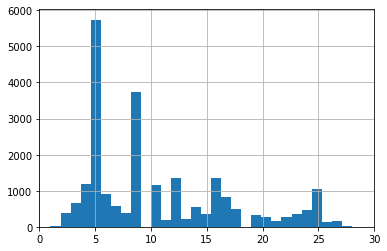

In [54]:
data['floors_total'].hist(bins=30)
plt.xlim(0,30);

<font color='4682B4'>Здесь значительное преимущество имеют 5тиэтажные и 9тиэтажные дома, что неудивительно, ведь это старые советские постройки, которые в большинстве во многих населенных пунктах.  </font>

<font color='4682B4'>
Так как в параметре cityCenters_nearest довольно много значений, я решила создать еще один стобец с "группировкой" этих значений и построить график уже по ним </font>

In [55]:
def city (distance):
    if 0<=distance<=1000:
        return "менее 1 км"
    elif 1000<=distance<=5000:
        return " 1-5 км"
    elif 5000<=distance<=10000:
        return "5-10 км"
    elif 10000<=distance<=30000:
        return "10-30 км"    
    elif 30000<=distance<=50000:
        return "30-50 км"
    elif 50000<=distance:
        return "более 50 км"
    else:
        return "расстояние неизвестно"
    return distance
data['cities_near']=data['cityCenters_nearest'].apply(city)


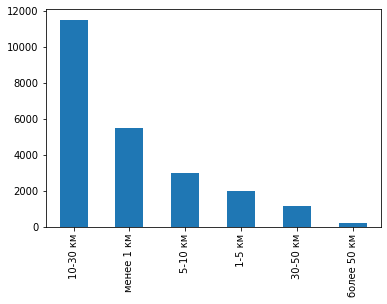

In [56]:
data['cities_near'].value_counts().plot(kind='bar');

<font color='4682B4'>Наибольшее количество проданных квартир находилось на расстоянии 10-30 км от центра ближайшего города. Почти в 2 раза меньше квартир находилось на совсем маленьком расстоянии от города- менее 1 км. Совсем непопулярными являются квартиры, находящееся дальше 50 км от центра ближайшего города.</font>

<font color='4682B4'>Хочу также проанализировать медианную цену в зависимости от отдаленности от города</font>

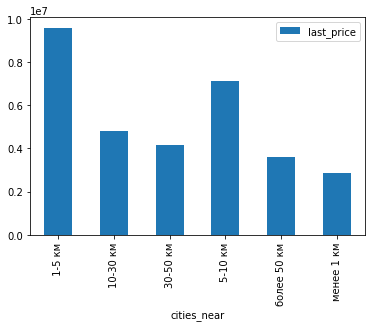

In [57]:
cities_pivot= data.pivot_table(index='cities_near', values='last_price', aggfunc='median')
cities_pivot.plot(kind='bar');

<font color='4682B4'>Наиболее высокая медианная цена за квартиры, расположенные на расстоянии 1-5 км от центра населенного пунтка. Думаю. что то, что наименьшая цена за квартиры, расположенные на расстоянии менее 1 км, объясняется тем, что они находятся в очень маленьких населенных пунктах, либо, конечно, это просто вброс. </font>

<font color='4682B4'> То же самое сделаю со столбцом parks_nearest и airports_nearest</font>

In [58]:
data['parks_nearest'] = data['parks_nearest'].astype (int)
def parks (distance):
    if 0<=distance<=100:
        return "менее 100 м"
    elif 100<=distance<=500:
        return " 100-500 м"
    elif 500<=distance<=1000:
        return "500-1000 м"
    elif 1000<=distance<=3000:
        return "1-3 км"    
    elif 3000<=distance<=5000:
        return "3-5 км"
    elif 5000<=distance:
        return "более 5 км"
    else:
        return "расстояние неизвестно"
    return distance
data['parks']=data['parks_nearest'].apply(parks)


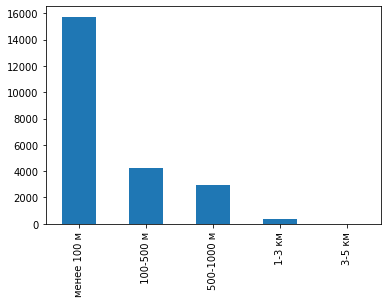

In [59]:
data['parks'].value_counts().plot(kind='bar');

<font color='4682B4'>Большая часть квартир находится в непосредственной близости к паркам, расстояние 1-3 км-наибольшее расстояние в данной выборке.</font>

In [60]:
data['airports_nearest'] = data['airports_nearest'].astype (int)
def airports (distance):
    if 0<=distance<=1000:
        return "менее 1 км"
    elif 1000<=distance<=5000:
        return " 1-5 км"
    elif 5000<=distance<=10000:
        return "5-10 км"
    elif 10000<=distance<=30000:
        return "10-30 км"    
    elif 30000<=distance<=50000:
        return "30-50 км"
    elif 50000<=distance:
        return "более 50 км"
    else:
        return "расстояние неизвестно"
    return distance
data['airports']=data['airports_nearest'].apply(airports)

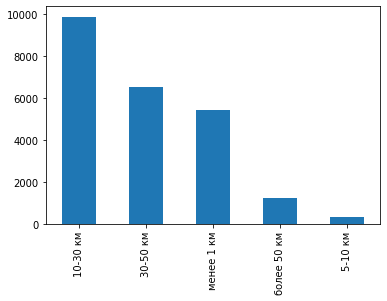

In [61]:
data['airports'].value_counts().plot(kind='bar');

<font color='4682B4'>По этим данным видно, что наиболее популярны квартиры, находящиеся относительно близко к аэропорту (10-50 км) и также совсем близко (менее 1 км). Квартир, находящихся далеко от аэропорта (более 50 км), менее 5%. </font>

In [62]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,one_m_cost,week_day,month,year,floor_type,city_center_km,cities_near,parks,airports
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,114,120370.370370,3,3,2019,другой,16.0,10-30 км,100-500 м,10-30 км
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,81,82920.792079,1,12,2018,первый,19.0,10-30 км,менее 100 м,10-30 км
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,558,92785.714286,3,8,2015,другой,14.0,10-30 км,менее 100 м,10-30 км
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,True,...,424,408176.100629,4,7,2015,другой,7.0,5-10 км,менее 100 м,10-30 км
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,121,100000.000000,1,6,2018,другой,8.0,5-10 км,100-500 м,30-50 км


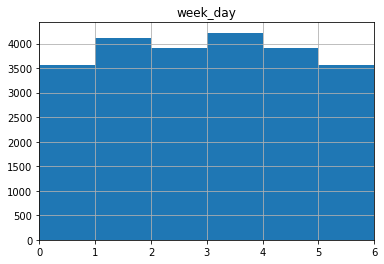

In [63]:
data.hist('week_day', bins=6)
plt.xlim(0,6);


<font color='4682B4'> Вторник и четверг имеют пиковые значения в данной гистограмме, наименьшие значения имеют суббота и воскресенье.

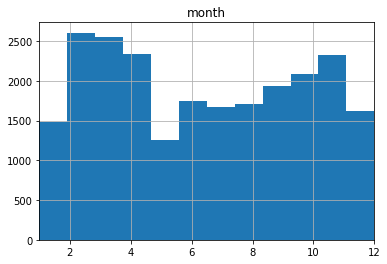

In [64]:
data.hist('month', bins=12)
plt.xlim(1,12);

<font color='4682B4'> Наиболее часто объявления публикуются в феврале, марте, апреле и ноябре. Наиболее редко в мае.

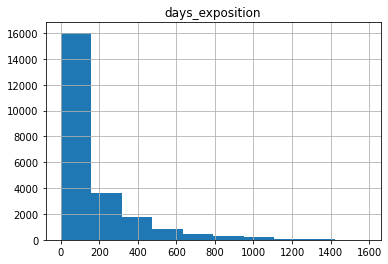

In [65]:
data.hist('days_exposition');


<font color='4682B4'> График показывает пик в значениях около 0, который выравнивается ближе к ~170-180. Посчитаем, сколько объявлений были сняты с продажи в первые 180 дней.<font>

In [66]:
data.query('days_exposition<=180')['days_exposition'].count()

16810

<font color='4682B4'>Крайне маловероятно, что более 60% объявлений были сняты с продажи в первые 180 дней, потому отбросим значения, в которых объявления были сняты меньше, чем за 2 недели. Также мы видим, что после 1300 значения практически равны 0, потому отбросим эти значения тоже. <font>

In [67]:
data.query('days_exposition >= 15 & days_exposition <= 1300')['days_exposition'].describe()

count    21505.000000
mean       181.550570
std        201.254733
min         15.000000
25%         60.000000
50%        107.000000
75%        215.000000
max       1299.000000
Name: days_exposition, dtype: float64

<font color='4682B4'> Итак мы видим, что среднее время продажи квартир- 180-200 дней, что означает, что квартиры, проданные меньше, чем за ~60 дней, считаются востребованными и наиболее быстро продаваемыми. Если продажа заняла более 215 дней, то она считается долгой. <font>

<font color='4682B4'> 
    Теперь обозначим, какие факторы влияют на стоимость объекта. Для этого построим графики зависимости цены от различных показателей. 
    
Построим матрицу корреляции и диаграмму рассеивания, чтобы показать зависимость цены от: 
    
    
  - общей площади;
    
    
  - жилой площади;
    
    
  - площади кухни;
    
    
  - количество комнат;
    
    
  - типа этажа, на котором расположена квартира (первый, последний, другой);
    
    
  - даты размещения (день недели, месяц, год);
    <font>

,total_area,rooms,last_price,cityCenters_nearest,living_area
total_area,1.000000,0.760379,0.653099,-0.079618,0.911152
rooms,0.760379,1.000000,0.364820,-0.065168,0.856860
last_price,0.653099,0.364820,1.000000,-0.052147,0.556316
cityCenters_nearest,-0.079618,-0.065168,-0.052147,1.000000,-0.084136
living_area,0.911152,0.856860,0.556316,-0.084136,1.000000


3940000.0
4870000.0
4300000.0


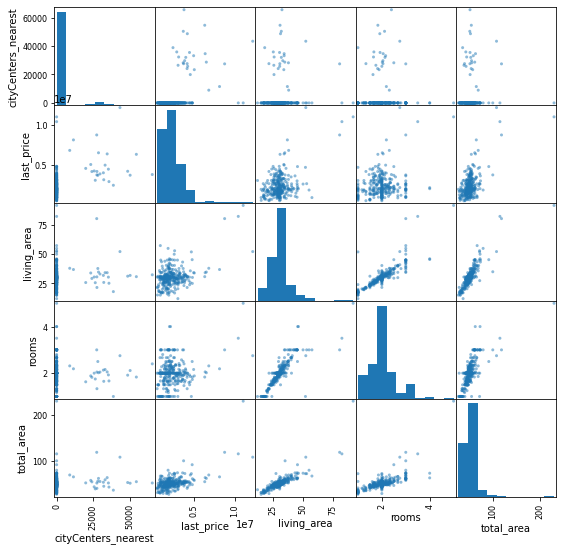

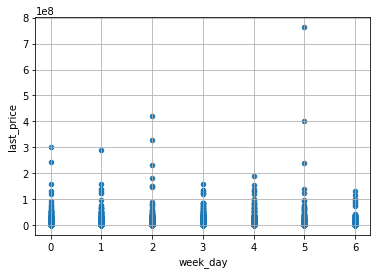

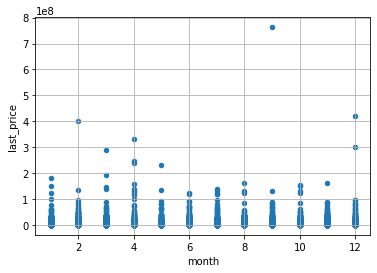

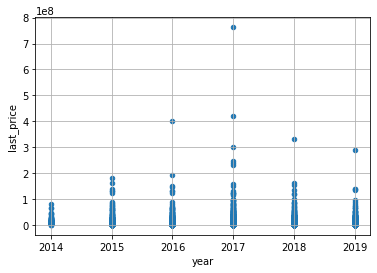

In [68]:
display(data[['total_area', 'rooms', 'last_price', 'cityCenters_nearest', 'living_area']].corr())
important_values = data.pivot_table(index='locality_name', values=['total_area', 'rooms', 'last_price', 'cityCenters_nearest', 'living_area'])
pd.plotting.scatter_matrix(important_values, figsize=(9, 9))
data.plot(x='week_day', y='last_price', kind='scatter', grid=True)
data.plot(x='month', y='last_price', kind='scatter', grid=True)
data.plot(x='year', y='last_price', kind='scatter', grid=True)
print(data.query('floor_type == "первый"')['last_price'].median())
print(data.query('floor_type == "другой"')['last_price'].median())
print(data.query('floor_type == "последний"')['last_price'].median())

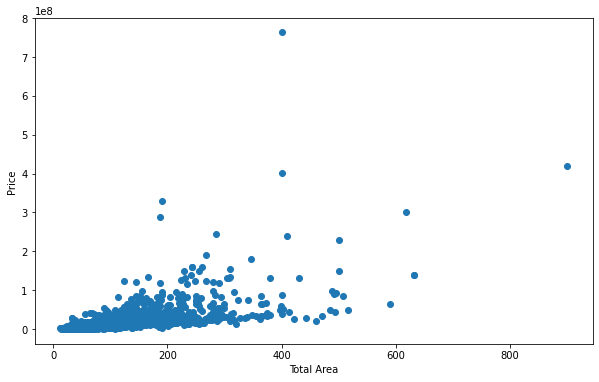

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data['total_area'], y = data['last_price'])
plt.xlabel("Total Area")
plt.ylabel("Price");

<font color='4682B4'> 
    
    
### Итак, построив графики мы можем заметить следующую зависимость: 
<font color='4682B4'> Цена в целом увеличивается пропорционально увеличению общей площади. Некоторые изменения довольно значительные, в основном резкий подъем цены не наблюдается. <font>

Text(0, 0.5, 'Price')

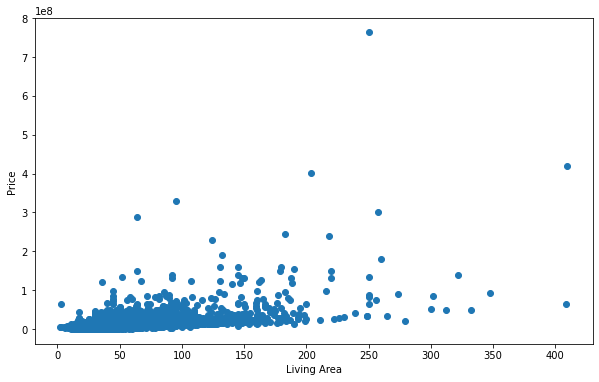

In [70]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data['living_area'], y = data['last_price'])
plt.xlabel("Living Area")
plt.ylabel("Price")

<font color='4682B4'> То же самое я могу заметить в графики зависимости цены от жилой площади объекта. Есть повышения цены в связи с увеличением жилой площади, но они, за редким исключением, скорее незначительны.

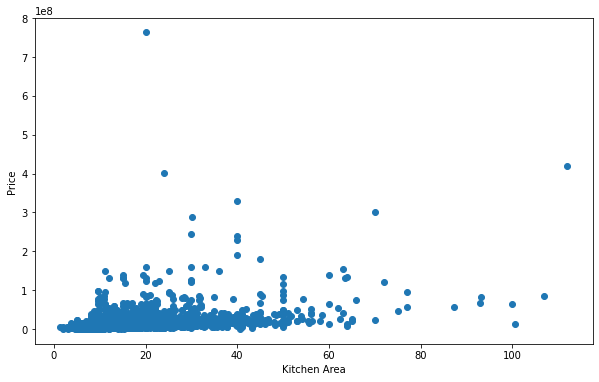

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data['kitchen_area'], y = data['last_price'])
plt.xlabel("Kitchen Area")
plt.ylabel("Price");

<font color='4682B4'> Что касается этого параметра, цена здесь вовсе не повышается и имеет практически одинаковые значения и при маленькой площади кухни, и при большой.

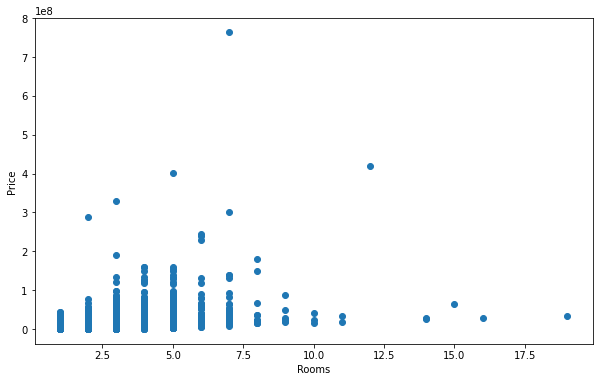

In [72]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data['rooms'], y = data['last_price'])
plt.xlabel("Rooms")
plt.ylabel("Price");

<font color='4682B4'> Думаю, что значения >10 скорее вброс, потому считаю правильнее оценивать без учета показателей выше. Этот график показывает прямую зависимость цены от количества комнат, таким образом, чем больше комнат, тем больше цена за квартиру.

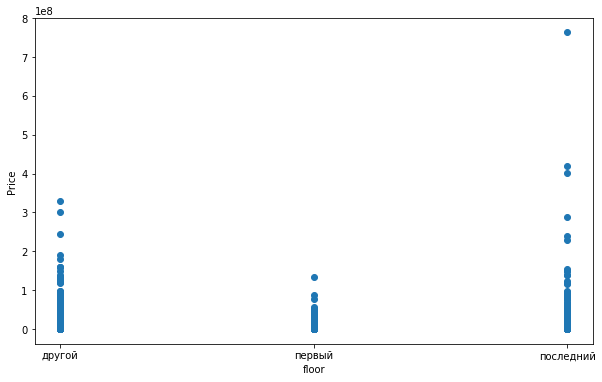

In [73]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data['floor_type'], y = data['last_price'])
plt.xlabel("floor")
plt.ylabel("Price");

<font color='4682B4'> Здесь отчетливо видно, что цена за "другой" и "последний" тип этажа значительно выше цены за "первый". Думаю, что это связано с нежеланием приобретать квартиру на уровне глаз прохожих и прочими проблемами жизни на первом этаже, вроде безопасности, холода, шума и так далее. 

<font color='4682B4'> Что касается дня недели: объявления, размещенные в среду и субботу, имели цены выше тех, что были размещены в остальные дни.
    То же самое можно сказать про месяц февраль, март и декабрь.
    И 2017 год. 
    Изменения в цене также порой незначительны, но они все же есть.

<font color='4682B4'> 

Как мы видим из графиков и корреляции, цена объекта находится в прямой зависимости от общей и жилой площади и количества комнат, то есть чем выше становится один показатель, тем выше будет другой. Также мы видим обратную зависимость с удаленностью объекта от центра, то есть чем выше становится цена, тем меньше будет расстояние до центра. Если сравнивать цену и день недели, месяц и год, когда было выложено объявление, то можно увидеть, что объявления, которые были размещены в среду и субботу, имеют цену немного выше, чем те, что были размещены в остальные дни недели. А также в феврале, марте и декабре, квартиры тоже продавались по большей стоимости. Такая же закономерность и с 2017 годом. В целом можно сказать, что отличия в цене небольшие, но они всё-таки есть.<font>

<font color='4682B4'> 
    
    
### Следующим шагом найдем топ 10 городов по количеству объявлений и узнаем населенные пункты с самой низкой и высокой ценой за 1 квадратный метр

In [74]:
top_10_city = data['locality_name'].value_counts().head(10)

In [75]:
display(top_10_city)

Санкт-Петербург    15467
Мурино               558
Кудрово              448
Шушары               435
Всеволожск           391
Пушкин               366
Колпино              337
Парголово            321
Гатчина              306
Выборг               235
Name: locality_name, dtype: int64

In [10]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,8009,5500000.0
посёлок Мурино,280,3400000.0
посёлок Шушары,259,3950000.0
Всеволожск,210,3450000.0
деревня Кудрово,199,3790000.0
Пушкин,199,5180000.0
Гатчина,187,3100000.0
посёлок Парголово,186,4100000.0
Колпино,173,3600000.0


In [79]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,15467,5550000.0
Мурино,558,3456000.0
Кудрово,448,3950000.0
Шушары,435,3990000.0
Всеволожск,391,3500000.0
Пушкин,366,5187319.0
Колпино,337,3600000.0
Парголово,321,4150000.0
Гатчина,306,3095000.0


<font color='4682B4'> Как мы видим, наибольшая цена за один квадратный метр в Санкт-Петербурге. (114 тысяч за кв.м.)

<font color='4682B4'> Минимальная же цена в Выборге. (58 тыс. за кв.м)

<font color='4682B4'> Наиболее высокая стоимость за кв.м именно в Санкт-Петербурге, потому интересно посмотреть, зависит ли она от цена от удаленности от центра города, если да, то сколько стоит каждый км ближе и дальше от центра? Произведём рассчёты и проанализируем полученные данные. 

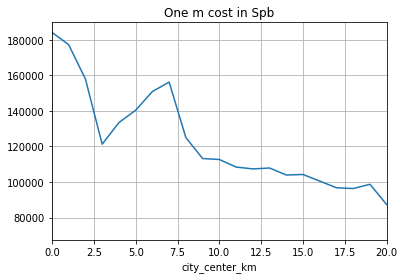

In [78]:
spb = data.query('locality_name == "Санкт-Петербург"')
spb_center_distance = spb.groupby('city_center_km')['one_m_cost'].mean().astype('int64')
spb_center_distance.plot(xlim=(0,20), grid = True, title = 'One m cost in Spb');


<font color='4682B4'> Этот график показывает значительную разницу в цене в зависимости от степени удаленности от центра города в Санкт-Петербурге. За 20 км цена уменьшилась в 2 раза, что говорит, что средняя цена каждого километра ~4-4,5 тысячи за один квадратный метр. 

<font color='4682B4'>
    
    
### Общий вывод
    
    
## Результаты исследования ##
    
Мною было проведено исследование рынка недвижимости в Санкт-Петербурге и близлежащих городах и посёлках.
В рамках этого исследования я:

* Изучила следующие параметры:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления
  Описала их и проанализировала корректность данных, а также удалила аномальные значения с целью наиболее точного анализа данных.
* Выявила среднее время продажи квартир, определила сроки "долгой" и "быстрой" продажи
* Выявила зависимость средней цены от следующих показателей:
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);

* Выявила населенный пункт с наибольшей и наименьшей ценой за кв.м.

* Выявила примерную цену кв.м. в зависимости от удаленности от центра города в крупнейшем городе выборки-Санкт-Петербурге.

## Вот, что мне удалось выяснить: 
    
    
* Наиболее популярны среди покупателей квартиры площадью 50-70 кв.м. Квартиры более 120 кв.м. покупаются крайне редко.При том жилая площадь, предпочитаемая среднестатистическим покупателем, -15-20 кв.м, а площадь кухни 5-12 кв.м (7 кв.м.самая популярная площадь для кухни)
    
    
* Средняя цена за квартиру-5 миллионов.
    
    
* Наиболее популярными являются 1-3хкомнатные квартиры, более чем в 2 раза реже покупают четырехкомнатные квартиры.
    
    
* 2,5-3,5 - стандартная высота потолков в проданных квартирах.
    
   
* Квартиры, находящиеся на 1-6 этаже являются наиболее часто покупаемыми.Квартиры на этажах 9-11 менее популярны. Квартиры, находящиеся на этажах 13-20, покупались реже 500 раз. Совсем редко покупались квартиры выше 25 этажа.
    
    
    
* Цена за квартиры не на первом и не на последнем этаже значительно выше. При том, если сравнивать первый и последний этаж, средняя цена за квартиру на последнем также выше средней цены за квартиру на первом. Также квартиры не на первом и не на последнем этаже покупаются гораздо чаще и быстрее.
    
    

* Квартиры в 5ти- и 9тиэтажных домах имеют значительное преимущество перед современными многоэтажными постройками.
    
    
* Наибольшее количество проданных квартир находилось на расстоянии 10-30 км от центра ближайшего города. Почти в 2 раза меньше квартир находилось на совсем маленьком расстоянии от города- менее 1 км. Совсем непопулярными являются квартиры, находящееся дальше 50 км от центра ближайшего города.
    
    
    
* Наиболее высокая медианная цена за квартиры, расположенные на расстоянии 1-5 км от центра населенного пункта.
    
    
    
* Большая часть купленных квартир находится в непосредственной близости к паркам, расстояние 1-3 км и в относительной близости к аэропортам (в пределах 10-50 км)
    
    
    
* Среднее время продажи квартир- 180-200 дней, что означает, что квартиры, проданные меньше, чем за ~60 дней, считаются востребованными и наиболее быстро продаваемыми. Если продажа заняла более 215 дней, то она считается долгой.
    
    

* Цена объекта находится в прямой зависимости от общей и жилой площади и количества комнат, то есть чем выше становится один показатель, тем выше будет другой. Прослеживается обратную зависимость с удаленностью объекта от центра, то есть чем выше становится цена, тем меньше будет расстояние до центра. Если сравнивать цену и день недели, месяц и год, когда было выложено объявление, то можно увидеть, что объявления, которые были размещены в среду и субботу, имеют цену немного выше, чем те, что были размещены в остальные дни недели. А также в феврале, марте и декабре, квартиры тоже продавались по большей стоимости. 
    
* В Санкт- Петербурге средняя цена каждого километра ~4-4,5 тысячи за один квадратный метр.
    
    
# Вывод:
    
    
* Наиболее благоприятными днями недели для публикации объявления являются среда и суббота, а месяцами- февраль, март, декабрь.

    
* Средняя рыночная цена за квартиру на "другом" (т.е. не первом и не последнем этажах) значительно выше.
    
    
* Наибольшее влияние на цену оказывают такие факторы как:
    - Количество комнат
    - цена за кв.м.
    - тип этажа
    - отдаленность от центра города.